In [1]:
#Forma de instalar versão diferente de pacote

!pip install seaborn==0.9.0
import seaborn as sns

print(sns.__version__)

     |████████████████████████████████| 208 kB 32.5 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
0.9.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd

notas = pd.read_csv('ratings.csv')

notas.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
# notas.momento = notas.momento.to_timestamp

In [5]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [6]:
notas.head(5)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando notas dos filmes

In [7]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [9]:
notas.nota.mean()

3.501556983616962

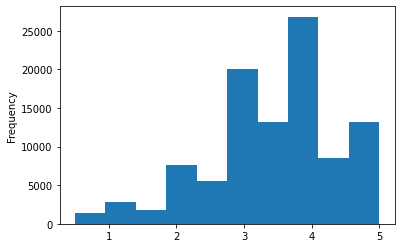

In [10]:
#O Pandas (DataFrame) possui função para plotar gráfico
#notas.nota.plot()
#Plot o histograma dos valores
notas.nota.plot(kind='hist')

In [11]:
print('Média', notas.nota.mean())
print('Mediana',notas.nota.median())

Média 3.501556983616962
Mediana 3.5


In [12]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

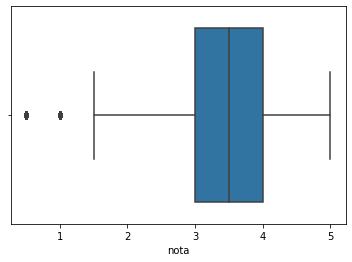

In [13]:
import seaborn as sns

sns.boxplot(notas.nota)

# Analisando Filmes

In [14]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head(5)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
notas.head(5)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando notas de alguns filmes

In [16]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

In [17]:
notas.query('filmeId == 2').nota.mean()

3.4318181818181817

In [18]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head(5)

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

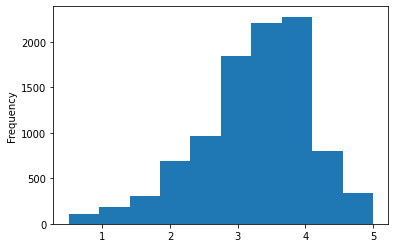

In [19]:
medias_por_filme.plot(kind='hist')

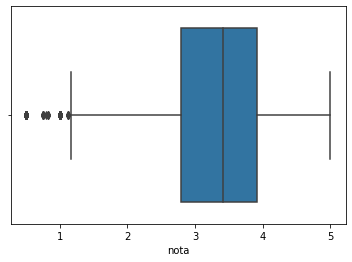

In [20]:
sns.boxplot(medias_por_filme)

In [21]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

In [22]:
#Bins - Agrupamento dos dados
#sns.displot(medias_por_filme, bins=10)

In [23]:
#sns.displot(medias_por_filme, bins=20)

Text(0.5, 1.0, 'Histograma das médias por filmes')

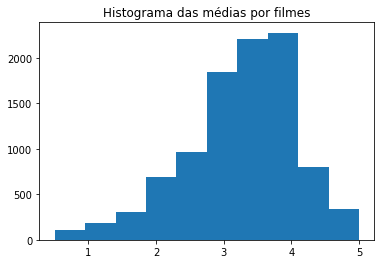

In [24]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title('Histograma das médias por filmes')

In [25]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [26]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [27]:
# 1 grau
# 2 grau 
# 3 grau 
# 1 grau < 2 grau < 3 grau -> categoria ordinal

In [28]:
# budget => orçamento -> quantidade continuo

In [29]:
# quantidade de votos -> 1 , 2, 3, 4 -> não tem 2.5 votos

In [30]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ta       2
cs       2
id       2
ro       2
ar       2
af       1
el       1
sl       1
ps       1
ky       1
tr       1
nb       1
hu       1
is       1
pl       1
te       1
xx       1
vi       1
no       1
Name: original_language, dtype: int64

In [31]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ta', 'cs', 'id', 'ro', 'ar', 'af',
       'el', 'sl', 'ps', 'ky', 'tr', 'nb', 'hu', 'is', 'pl', 'te', 'xx', 'vi',
       'no'],
      dtype='object')

In [32]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [33]:
#Transformar a serie em um Frame
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


In [34]:
# Criar um index próprio 
tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [35]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head(5)

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


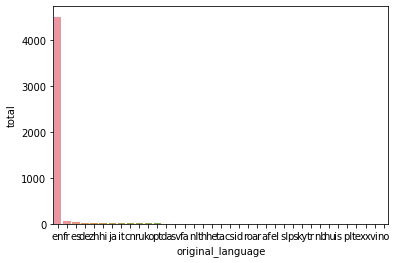

In [36]:
sns.barplot( x= 'original_language', y='total', data = contagem_de_lingua )

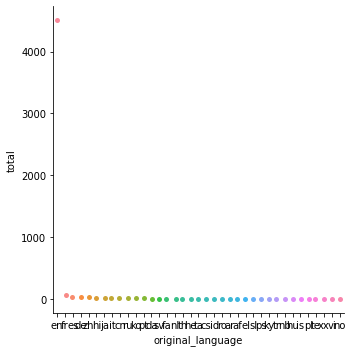

In [37]:
sns.catplot( x= 'original_language', y='total', data = contagem_de_lingua )

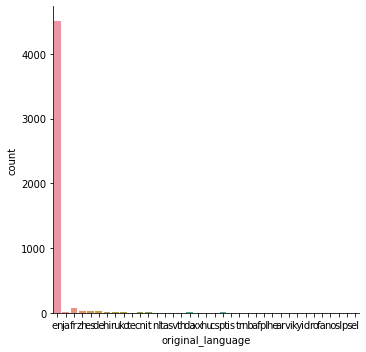

In [38]:
# Outra forma de fazer o gráfico categórico - tmdb (base original dos dados)
sns.catplot( x= 'original_language', kind='count', data = tmdb )

([<matplotlib.patches.Wedge at 0x7f030331b8d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

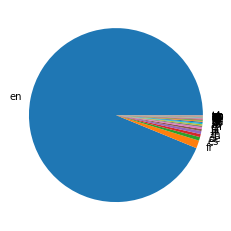

In [39]:
plt.pie( contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'] )

In [40]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en'] #loc -> valor do index da serie
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


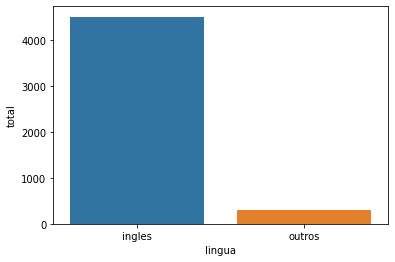

In [41]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles,total_do_resto]
}
dados = pd.DataFrame(dados)
dados
sns.barplot(x='lingua', y='total', data = dados)

([<matplotlib.patches.Wedge at 0x7f03031dfc50>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

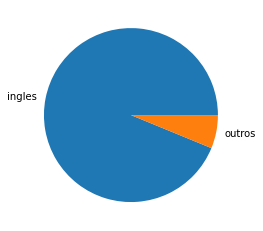

In [42]:
plt.pie(dados['total'], labels = dados['lingua'])

In [43]:
total_por_lingua_de_outros_filmes = tmdb.query('original_language != "en"').original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
id     2
ar     2
cs     2
ta     2
ro     2
el     1
no     1
pl     1
ps     1
af     1
xx     1
ky     1
hu     1
vi     1
is     1
sl     1
tr     1
nb     1
te     1
Name: original_language, dtype: int64

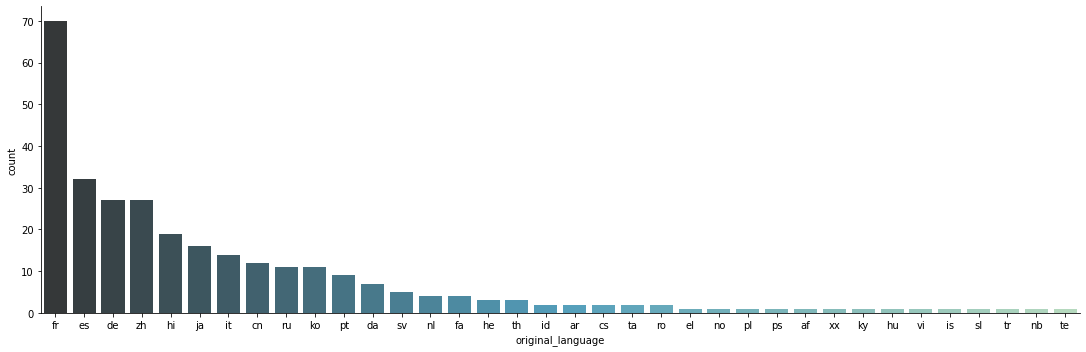

In [44]:
filmes_sem_lingua_em_ingles = tmdb.query('original_language != "en"')
# Refinar gráfico (Visualização)
#plt.figure(figsize=(12,16))
#Alguns gráficos como catplot possui propriedades mais alto nível 
#Apresentar o gráfico
# Aspect -> quanto maior o valor mais retangular se torna o gráfico
# palette -> Melhor o padrão de cor
sns.catplot(x='original_language', kind='count', data = filmes_sem_lingua_em_ingles
            , aspect = 3 , order = total_por_lingua_de_outros_filmes.index
            , palette = "GnBu_d")

# Revisando Papel da: Média, Mediana, medidas de tendências central, dispersão, desvio padrão e histograma

In [45]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [46]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [47]:
notas_do_toy_store = notas.query('filmeId == 1')
notas_do_jumanji = notas.query('filmeId == 2') 
print( len(notas_do_toy_store), len(notas_do_jumanji))

215 110


In [48]:
print('Media do Toy Store -> ', round(notas_do_toy_store.nota.mean(), 2))
print('Media do Jumanji -> ', round(notas_do_jumanji.nota.mean(), 2))

Media do Toy Store ->  3.92
Media do Jumanji ->  3.43


In [49]:
print('Mediana do Toy Store -> ', round(notas_do_toy_store.nota.median(), 2))
print('Mediana do Jumanji -> ', round(notas_do_jumanji.nota.median(), 2))

Mediana do Toy Store ->  4.0
Mediana do Jumanji ->  3.5


In [69]:
#calculo de Desvio Padrão - STD
print(notas_do_toy_store.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114045 0.8817134921476455


In [53]:
import numpy as np
#Criar listas com valores repetidos
#np.array([2.5] * 10)
#np.array([3.5] * 10)
filme1 = np.append([2.5] * 10, [3.5] * 10)
filme2 = np.append([5] * 10, [1] * 10)

In [54]:
filme1

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [55]:
filme2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))
print(np.std(filme1), np.std(filme2))

3.0 3.0
3.0 3.0
0.5 2.0


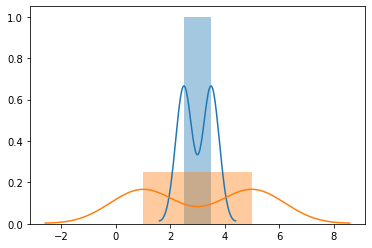

In [58]:
#Histograma em Seaboarn
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

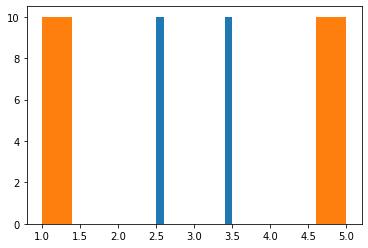

In [59]:
#Histograma pyPlot
plt.hist(filme1)
plt.hist(filme2)

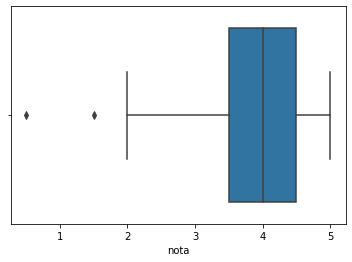

In [63]:
sns.boxplot(notas_do_toy_store.nota)

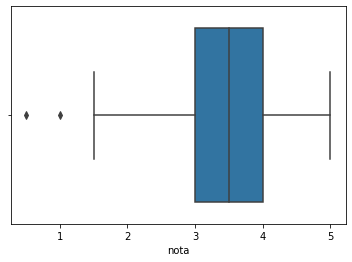

In [62]:
sns.boxplot(notas_do_jumanji.nota)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f02fdc6a150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02fdbc2390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02fdb66f10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02fdb66b10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02fdc17390>,
  <matplotlib.lines.Line2D at 0x7f02fdbd1bd0>]}

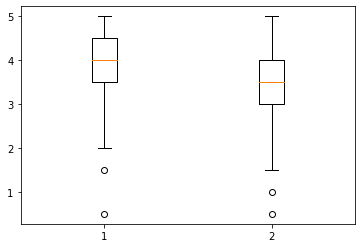

In [64]:
plt.boxplot([notas_do_toy_store.nota, notas_do_jumanji.nota])

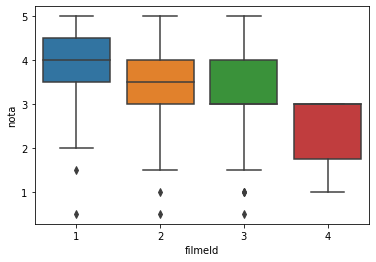

In [67]:
sns.boxplot(x='filmeId', y='nota', data = notas.query('filmeId in [1,2,3,4]'))